# General notes on control

Resources from: <br>
[Steve Brunton Control Bootcamp - YouTube]() <br>
[Brian Douglas - YouTube](https://www.youtube.com/watch?v=uqjKG32AkC4)
[APMonitor](https://apmonitor.com/pdc/index.php/Main/ModelSimulation)

**Stability** - the tendancy of system's response returns to zero after being disturbed. i.e. the ball in the bottom of a valley is stable, a ball on top of a hill is not. 

A subsequent question, what is the magnitude of stability which is important especially when external pertubation/shocks in the system or uncertainties. However, over having large magnitude for stability then impacts the system as any control then becomes difficult to respond. 

**Frequency response** is the steady-state response of a system to a sinsusoidal input. In *frequency response* methods, the input signal's frequency is varied over a certain reange and study the resulting response. Further, when a system's *transfer functions* is not known *frequency response* method can be used with experimental data to approximate transfer function.

## Linear time invariant system
A linear time invariant system is aptly named as it has two main properties; linearity and time invariance.
- Linear; the system will behave appropriately under additive, scaling and derivative operations. 
- Time invariance; whether an input is applied to the system now or T seconds from now, the output will be identical except for a time delay of T seconds, i.e. $\displaystyle x(t)}x(t)$ is {\displaystyle y(t)}y(t), then the output due to input {\displaystyle x(t-T)}x(t-T) is {\displaystyle y(t-T)}y(t-T). 

## Three views of a system

Any linear time invariant system can represented in three different forms:
1. State space representation
2. Differential equation (ODE)
3. Transfer function (s-domain)

Note: any LTI system can be described as a result of its inpulse response, the Dirac delta function at time = 0. Linear-time invariant systems are important as they allow a system to be fully characterised by the function $h(t)$ such $y(t) = h(t)*x(t)$ where \* is the convolution.


A [fantastic resource](https://apmonitor.com/pdc/index.php/Main/ModelSimulation) for illustrating these three representations. Example, given *ordinary differntial equation* representation of system, $\tau_p \frac{dy}{dt} + y = k_pu$ find the *state space* and the *transfer function* representation. 

### 1. State space representation 
A state space representation of a dynamical system can be constructed by converting a set of differential equations (generally of order 2 or more) into a system of first order differential equations. Conversion is done by a coordinate transform of the system. The *state space representation* will take the form: 

$$ 
\dot{x} = Ax + Bu\\
Y = Cx + Du
$$

By converting to the *state space representation* analysis of stability of a system becomes trivial through analysis of the eigenvalues/eigenvectors of A.

### 2. Differential equation
The differential equation representation of a linear time invariant system is traditional form where rates of change of the state of system/system output are equal to a function of the system's state,, y, plus an input component, u. 


### 3. Transfer function
Transfer function - *the Laplace transform of the impulse response of an LTI system* and provide a methodology to analyse a system in its constituent components. The transfer function representation sets the system as in the frequency (s-)domain. Mapping into the s-domain is through application Laplace transforms. One advantages of the transfer function representation (a by-product of the Laplace transform) is operations on ordinary differential equations become algebraic operations in the s-domain menaing system components can simply be multiplied together avoiding need for complex convolutions. 

Avoiding convolutions is done by starting with the inpulse response of LTI system, the Dirac delta which is just an input at time = 0. This is then generalised to an artibitrary input which can be thought of as an infinite number of inpulses; thus the arbitrary input = sum(all inpulse response curves); this sum is also called the convolution integral. Given input u(t) and system (inpulse response) g(t) then output $y(t) = \int^\infty_0u(\tau)g(t-\tau)d\tau$. However, taking the Laplace transform of U(t), G(t) and Y(t) turns the integral $Y(s) = U(s)G(s)$ where $G(s)$ is the transfer function and reduces the convolution into a simple multiplication.

## The step function
In controls analysis, (unit) step functions are used to analyse a system's response to a (unit) input. Such an input can be thought of as a Heavside function where:
$$
\begin{cases}
0 & x < 0\\
1 & x > 1 \\
\end{cases}
$$

In Python, a *linear time invariant* object can be analysed by calling the *.step()* function. Inspecting the source of this function you'll find the code does the following: 
1. Defines initial values, X_0 and time array T, if not defined. 
2. Creates a vector of ones of length T; i.e. creates a vector unit (1) inputs. 
3. Simulates system with *lsim2* by passing (system, U, T, X_0)
4. *lsim2*, after checks are made, passes the system to *odein* which solves the initial value problem and returns a vector of X(t), the system's value at time = t. 

### Pole-zero representation
Poles are the roots of the denominator of a transfer function. Zeros are the roots of the nominator of a transfer function.

*Determination:*
Poles are determined by equating D(s) with 0 and solving for s. Zeros are determined by equating N(s) with 0 and solving for s.

*Amount:*
The number of poles is always greater or equal to the Zeros.

*Effects of additional Poles and Zeros in First Order system*
Additional Poles delay the response of a system.
Left half-plane zeros speed up the response of a system and the right half-plane cause the response to go in the opposite direction.

### Bode plots
Mostly used to analyse the stability of a controls system - a simple way of describing frequency response of a linear time invariant system. Bode plots are used to analyse steady state systems i.e. once transient factors have died out in other words input $u(t) = sin(\omega t)$. After passing input through system, G(s), the output $y(t)= M sin(\omega t + \phi)$, a sin wave with the same frequency just shift by $\phi$ and scaled by magnitude M. 

Bode plots show *frequency response* of system with *steady state sinusodial* inputs; returns two plots of frequency repsonse; one for magnitude vs frequency and one for phase frequency. Frequency response of a transfer function, H(s), is defined where $\sigma = 0 $ thus $s = \sigma + j\omega = j \omega$.  Note: when analysing a system the **magnitude of a complex number is**:  $|C| = C  \bar{C}$ such that $|s| = (j\omega) (-)j\omega = \sqrt{\omega^2}$. 

*Magnitude* is calculated as $|G(j\omega)|$ and *phase shift* as $\angle G(s)= -tan^{-1}(\frac{real}{imaginery})$

Note: in the $\sigma = 0 $ thus $s = \sigma + j\omega = j \omega$. The reason for $\sigma = 0$ is that we are looking at the response of the system to periodic (and thus non-decaying) sinusoidal signals, whereby Laplace conveniently reduces to Fourier along the imaginary axis. The real axis in the Laplace domain represents exponential decay/growth factors that pure signals do not have, and which Fourier does not model. 

### Alternative analysis to system's differential equations
Root-locus and Bode plots (frequency response) provide two methods to predict and analyse a system's performance without resorting to differential eqautions. 

#### Root-locus plots

#### Bode plots
Mostly used to analyse the stability of a controls system - a simple way of describing **frequency response** of a linear time invariant system. **Frequency response** is the steady-state response of a system to a sinsusoidal input.
Bode plots show frequency response of system with *steady state sinusodial* inputs; returns two plots of frequency repsonse, one for magnitude vs frequency and one for phase frequency.

Note for magnitude *decibels* are used which is transformation of magnitude using equation $20 log_{10}(\frac{A}{A_0})$

#### Gain and phase margins
Gain and phase margins are important as they give an indication of how far a system is away from stability. These points relate to the Nyquist point of (-1,0) where by a system is unstable. Note: (-1,0) translates to a point of 0Db and 180 degrees on Bode plot (

*Gain margin* - the frequency at which the phase shift is 180 degrees

*Phase margin* - the frequency at which the magnitude is 0Db

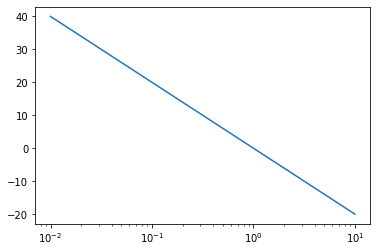

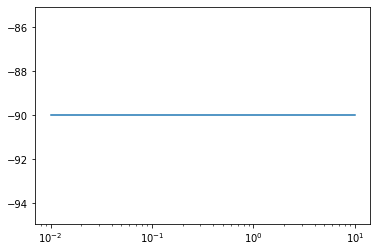

In [4]:
from scipy import signal
import matplotlib.pyplot as plt

# create a linear time invariant system \frac{1}{s+1}
sys = signal.TransferFunction([1], [1, 0])
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

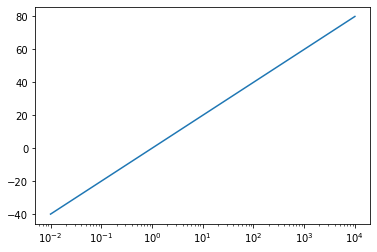

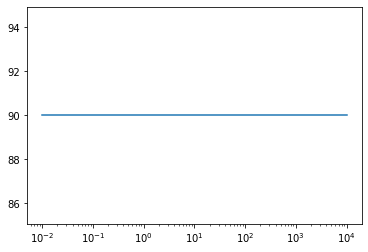

In [3]:
# create a linear time invariant system \frac{s}{1}
sys = signal.TransferFunction([1,0], [1])
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()